# Maximal Margin Classifier
We need a reasonable way of constucting a hyperplane, out of the possible choices.

Maximumal margin hyperplanes look at getting the hyperplane that is the furthest from the training obeservations - we compute the perpendicular distance from each training observation to a given separating hyperplane. The maximal margin hyperplane is the separating hyperplane for which the margin is largest.

We hope the classifier with a large margin on the training data will generalise well to unseen test observations.

In [16]:
%matplotlib inline
def plot_svc_margin(clf, xmin, xmax, highlight=False):
    w = clf.coef_[0]
    b = clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = clf.support_vectors_
    
    with sns.axes_style("dark"):
        plt.fill_between(x0, gutter_down, facecolors='white')
        plt.fill_between(x0, gutter_up, xmax, facecolors='white')
        if highlight:
            g = sns.scatterplot(x = svs[:, 0], y = svs[:, 1], s=180, facecolors='#FFAAAA')
        plt.plot(x0, decision_boundary, "g-", linewidth=2)
        plt.plot(x0, gutter_up, "r--", linewidth=2)
        plt.plot(x0, gutter_down, "r--", linewidth=2)
        plt.arrow(svs[0, 0],svs[0, 1], 0.65, 0.15, fc='k', ec='k', linewidth=1, length_includes_head=True)
        plt.arrow(svs[1, 0],svs[1, 1], -0.65, -0.15, fc='k', ec='k', linewidth=1, length_includes_head=True)

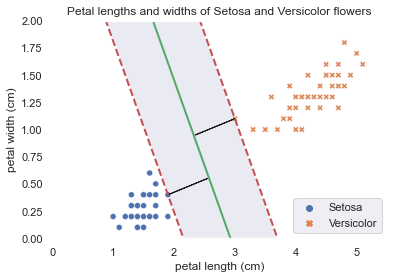

In [17]:
plot_svc_margin(svm_clf, 0, 5.5)
set_versi_plot()
plt.show()

We can see below there are two equidistant points from the maximal margin hyperplane, lying on the dashed lines. There observations are called *Support Vectors*, as if these moved so would the hyperplane.

The maximal margin hyperplane only depends on these support vectors, meaning other points could be moved without the hyperplane moving.

**[Maybe add the about all other weights being 0 from other lecture]**

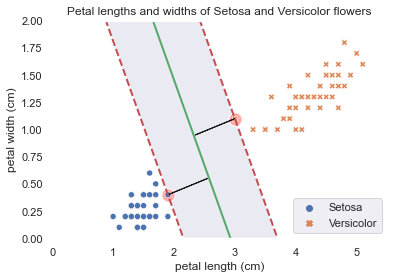

In [18]:
plot_svc_margin(svm_clf, 0, 5.5, highlight=True)
set_versi_plot()
plt.show()

This maximal margin hyperplane is the solution to the optemisation problem for choosing $\beta_0,\beta_1, ...\beta_p$ to maximise $M$,

subject to $\sum^p_{j=1}\beta^2_j = 1$,

$\beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ... + \beta_pX_{ip} \geq M \quad \forall i = 1,...,n$

The constraints above just ensure that each observation is on the correct side of the hyperplane and at least a distance $M$ from the hyperplane; meaning $M$ represents our hyperplane.

- $\beta_0 + \beta_1X_{i1} + \beta_2X_{i2} + ... + \beta_pX_{ip} \geq M \quad \forall i = 1,...,n$ guarentees each datapoint is on the correct side of the hyperplane if M is posaative
- the constraint $\sum^p_{j=1}\beta^2_j = 1$, can be used to show that the perpendicular distance from the $i$th observation to the hyperplane is given by $y_i(\beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ... + \beta_px_{ip})$

### Limitations

However this method is sensitive to outliers. In figure X, we can see that the reliance on a small number of observations means there is now a small margin. We want to be confident that a distance from the hyperlane is a measure of our confidence in its classificaion, and that we have no overfit to our training data.

In other cases, no exact linear separating hyperplane exists (so no solution to $M > 0$). Therefore we may want to use a hyperplane that *almost* separates the two classes, allowing some errors, using a *soft margin* (Support Vector Classifier).

Furthermore, if $P$ is large, this approach often leads to overfitting.

In [19]:
%matplotlib inline
# adapted from https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb


def outlier_margin():
    X = set_versi[["petal length (cm)", "petal width (cm)"]].values
    y = le.transform(set_versi[["target"]].values.ravel())
    X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
    y_outliers = np.array([0, 0])
    Xo = np.concatenate([X, X_outliers[1:]], axis=0)
    yo = np.concatenate([y, y_outliers[1:]], axis=0)

    svm_clf = SVC(kernel="linear", C=float("inf"))
    svm_clf.fit(Xo, yo)

    plot_svc_decision_boundary(svm_clf, 0, 5.5)
    g = sns.scatterplot(x = Xo[:,0], y = Xo[:,1], hue=yo, style = yo)
    leg = g.axes.get_legend()
    new_labels = ['Setosa', 'Versicolor']
    for t, l in zip(leg.texts, new_labels): t.set_text(l)
    plt.axis([0, 5.5, 0, 2])
    plt.title("Figure X: Effect of outliers")
    plt.xlabel("Petal Length (cm)")
    plt.ylabel("Petal Width (cm)")
    
def soft_margin(title, hyperplane=False):
    virgin_versi = iris_vis[["petal length (cm)", "petal width (cm)", "target"]]
    virgin_versi = virgin_versi[virgin_versi.target != "Setosa"]

    X = virgin_versi[["petal length (cm)", "petal width (cm)"]].values
    y = virgin_versi[["target"]].replace({'Versicolor':0, 'Virginica':1}).values.ravel()
    
    if hyperplane:
        svm_clf = SVC(kernel="linear", C=100)
        svm_clf.fit(X, y)

        plot_svc_decision_boundary(svm_clf, 2.9, 7)
    labels = virgin_versi[["target"]].values.ravel()
    sns.scatterplot(x = X[:,0], y = X[:,1], hue=labels, style = labels)
    plt.axis([2.9, 7, 0.9, 2.75])
    plt.title(title)
    plt.xlabel("Petal Length (cm)")
    plt.ylabel("Petal Width (cm)")

def hard_margin_limits():
    fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
    plt.sca(axes[0])
    outlier_margin()
    
    plt.sca(axes[1])
    soft_margin("No exact linear separating hyperplane")

    plt.show()
    plt.close()

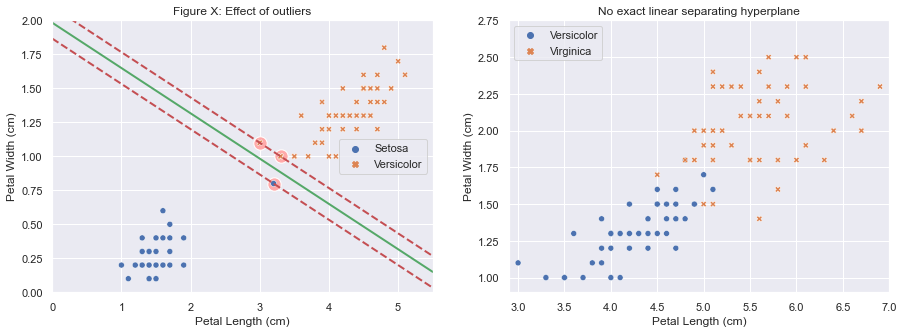

In [20]:
hard_margin_limits()

## Exercises

1. Describe what a support vector is.

2. In the plot below, which points are the "support vectors"?

3. [INSERT]

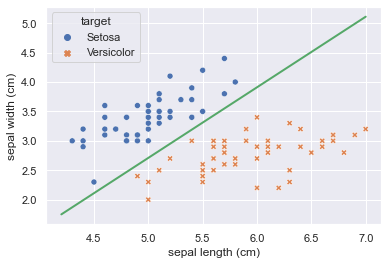

In [21]:
# QUESTION 2
exersise_ = iris_vis[["sepal length (cm)", "sepal width (cm)", "target"]]
exersise_ = exersise_[exersise_.target != "Virginica"]

X = exersise_[["sepal length (cm)", "sepal width (cm)"]].values
y = le.transform(exersise_[["target"]].values.ravel())

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]

x0 = np.linspace(4.2, 7, 200)
decision_boundary = -w[0]/w[1] * x0 - b/w[1]

plt.plot(x0, decision_boundary, "g-", linewidth=2)
g = sns.scatterplot(data=exersise_, x = "sepal length (cm)", 
                y = "sepal width (cm)", hue="target", 
                style = "target")

## Exercise Answers
1. A support vector is...
2. It uses more than 1 here, although which ones are quite tricky to desern so dont worry if you got a few of the blue points wrong!

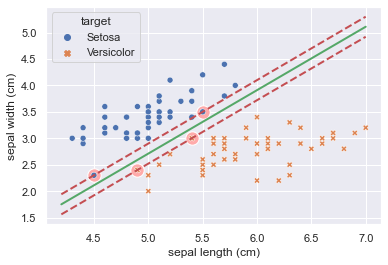

In [22]:
# ANSWERS 2
exersise_ = iris_vis[["sepal length (cm)", "sepal width (cm)", "target"]]
exersise_ = exersise_[exersise_.target != "Virginica"]

X = exersise_[["sepal length (cm)", "sepal width (cm)"]].values
y = le.transform(exersise_[["target"]].values.ravel())

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]

x0 = np.linspace(0, 5.5, 200)
decision_boundary = -w[0]/w[1] * x0 - b/w[1]
plot_svc_decision_boundary(svm_clf, 4.2, 7)
g = sns.scatterplot(data=exersise_, x = "sepal length (cm)", 
                y = "sepal width (cm)", hue="target", 
                style = "target")

# References
1. Fisher, R. A. (1936). The use of multiple measurements in taxonomic problems. Annals of eugenics, 7(2), 179-188.
2. James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani. An introduction to statistical learning. Vol. 112. New York: springer, 2013.
3. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".
4. Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. " O'Reilly Media, Inc.".
5. Raschka, 2016

web1.  https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html
web2. https://scikit-learn.org/stable/datasets/toy_dataset.html

# NOTES
- https://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py